In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
df=pd.read_csv('/content/drive/My Drive/project999/combined_data_1.txt.zip',usecols=[0,1],names=['customer_id','movie_rating'],header=None)

In [13]:
df.head()

,customer_id,movie_rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   customer_id   object 
 1   movie_rating  float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [15]:
df.shape

(24058263, 2)

In [16]:
movie_count=df.isnull().sum()[1]
movie_count

4499

In [17]:
total_values_custid=df.customer_id.nunique()

In [18]:
unique_customers=total_values_custid-movie_count
unique_customers

470758

In [19]:
total_ratings=len(df.customer_id)-movie_count
total_ratings

24053764

Text(0.0, 1.0, 'Total 4499 movies, 470758 unique customers, with a total of 24053764 ratings given')

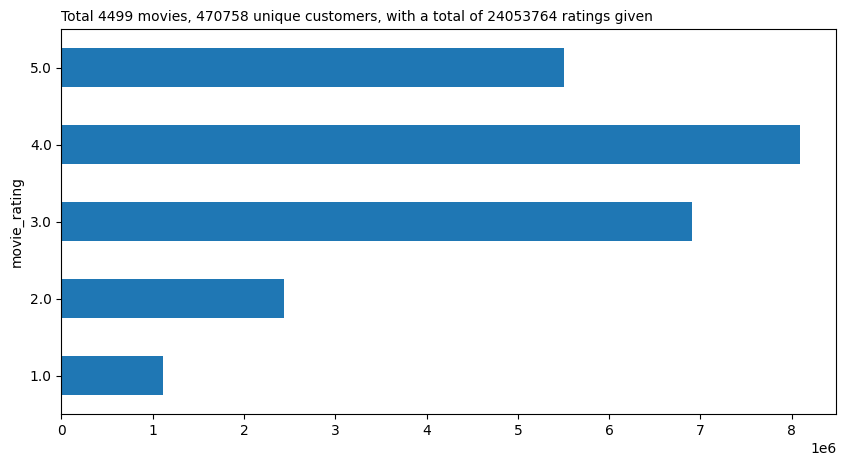

In [20]:
ratings=df.groupby('movie_rating')['movie_rating'].count()
ratings.plot(kind='barh',legend=False, figsize=(10,5))
plt.title(f'Total {movie_count} movies, {unique_customers} unique customers, with a total of {total_ratings} ratings given', fontsize=10,loc='left')

In [21]:
# finding all the null values in the movie_rating column

ratings_null=pd.DataFrame(pd.isnull(df.movie_rating))
ratings_null

,movie_rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [22]:
ratings_null=ratings_null[ratings_null.movie_rating==True].reset_index()
ratings_null

,index,movie_rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [23]:
movie_row=[]
movie_id=1

# for all the rows

for i, j in zip (ratings_null['index'][1:],ratings_null['index'][:-1]):
    temp=np.full((1,i-j-1),movie_id)
    movie_row=np.append(movie_row,temp)
    movie_id+=1

# for the last row
last_rec=np.full((1,len(df)-ratings_null.iloc[-1,0]-1),movie_id)
# last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_row=np.append(movie_row,last_rec)

print(movie_row)
print(len(movie_row))

[1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
24053764


In [24]:
# appending movie_row column to the dataframe and removing null values

df=df[pd.notnull(df['movie_rating'])]
df['movie_id']=movie_row.astype(int)
df['customer_id']=df['customer_id'].astype(int)
df.head()

,customer_id,movie_rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In the following steps we will drop all the values where:
1. the users have rated less movies
2. the movies have ratings below a certain threshold

In [25]:
funcs=['count','mean']
movie_summary=df.groupby('movie_id')['movie_rating'].agg(funcs)
movie_summary

,count,mean
movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [26]:
# creating a threshold to remove movies that are rated less
threshold1=round(movie_summary['count'].quantile(0.7),0)

In [27]:
top_70p_movies=movie_summary[movie_summary['count'] <threshold1].index
top_70p_movies

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='movie_id', length=3149)

In [28]:
# now removing inactive users
customer_summary=df.groupby('customer_id')['movie_rating'].agg(funcs)
customer_summary

,count,mean
customer_id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [29]:
# creating a threshold for the users
threshold2=round(customer_summary['count'].quantile(0.7),0)
threshold2

52.0

In [30]:
top_70p_customer=customer_summary[customer_summary['count']<threshold2].index
top_70p_customer

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='customer_id', length=327300)

In [31]:
df=df[~df['movie_id'].isin(top_70p_movies)]
df=df[~df['customer_id'].isin(top_70p_customer)]
df.shape

(17337458, 3)

In [32]:
df.head()

,customer_id,movie_rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [33]:
# data pre-processing before fitting it to the model
# making df into a sparse matrix
df_matrix=pd.pivot_table(df, index='customer_id', columns='movie_id', values='movie_rating')
df_matrix

movie_id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
customer_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649378,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN


In [34]:
# loading the movie information file
movie_titles=pd.read_csv('/content/drive/My Drive/project999/movie_titles.csv',encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['movie_id','year','name'])
movie_titles=movie_titles.set_index('movie_id')

In [36]:
movie_titles.head()

,year,name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [38]:
# installing required library for model building
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811602 sha256=4d85fbc7f4e8fb5a8ff43191f128b8d986751be40d6147b5bb4dfc1f6cc7e0db
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [39]:
# model building
# importing required libraries
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [40]:
# setting up a reader object to read the dataset
reader=Reader()

In [41]:
# for quick results, only first 100k rows will be considered for the project
df_data=Dataset.load_from_df(df[['customer_id','movie_id','movie_rating']][:100000],reader)

In [42]:
# building model
svd=SVD()
cross_validate(svd,df_data,measures=['RMSE','MAE'],cv=3)

{'test_rmse': array([0.99676941, 0.99373495, 1.00017913]),
 'test_mae': array([0.8053653, 0.8008283, 0.8074134]),
 'fit_time': (1.4000113010406494, 2.3371548652648926, 1.654184103012085),
 'test_time': (0.28182435035705566, 0.4740908145904541, 0.3249058723449707)}

In [44]:
df.head()

,customer_id,movie_rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [45]:
# taking the 5th user's data a recommending movies based on past data
df_user656399	=df[(df['customer_id']==656399) & (df['movie_rating']==5)]
df_user656399

,customer_id,movie_rating,movie_id
3014153,656399,5.0,571
6372984,656399,5.0,1245
7919921,656399,5.0,1590
8557497,656399,5.0,1707
21389868,656399,5.0,3986


In [47]:
# making a copy of movie titles for user 656399 specifically
user656399=movie_titles.copy()
user656399=user656399.reset_index()


,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [48]:
user656399=user656399[~user656399['movie_id'].isin(top_70p_movies)]
user656399

,movie_id,year,name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [49]:
user656399['estimated_score']=user656399['movie_id'].apply(lambda x: svd.predict(656399,x).est)
user656399=user656399.drop('movie_id',axis=1)

<ipython-input-49-f9f41157ac15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user656399['estimated_score']=user656399['movie_id'].apply(lambda x: svd.predict(656399,x).est)


In [51]:
user656399=user656399.sort_values('estimated_score',ascending=False)
print(user656399)

         year                        name  estimated_score
27     2002.0             Lilo and Stitch         4.204890
29     2003.0      Something's Gotta Give         3.917230
17     1994.0            Immortal Beloved         3.728699
2      1997.0                   Character         3.673325
51     2002.0     The Weather Underground         3.643947
...       ...                         ...              ...
15338  1999.0                 Three Kings         3.643947
7      2004.0  What the #$*! Do We Know!?         3.561214
15     1996.0                   Screamers         3.293342
16     2005.0                   7 Seconds         2.993494
25     2004.0             Never Die Alone         2.383798

[14621 rows x 3 columns]


## ****The End****